In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.use('default')

In [37]:
from f1_db_queries import (
    connect_to_db, run_query, run_query_generic,
    run_query_results, run_query_qualifying, run_query_max_points,
    COND_FASTEST_LAPS, COND_RACE_WINNERS, COND_POLE_POSITION,
    get_constructors_info, get_drivers_info, get_champions
)
from f1_graphs import (
    parse_dataframe, TEAM_COLORS,
    plot_results_year_round_team_color,
    plot_num_unique_winners_per_year, plot_wins_per_year
)

In [4]:
graphs_folder = 'images'

In [5]:
mydb, cursor = connect_to_db()

In [84]:
constructors_df = get_constructors_info(cursor)
drivers_df = get_drivers_info(cursor)
champions_df = get_champions(cursor)

In [94]:
races_fastest_laps = run_query_results(cursor, COND_FASTEST_LAPS)
results_fastest_laps = parse_dataframe(races_fastest_laps, constructors_df, champions_df)

plot_results_year_round_team_color(results_fastest_laps, constructors_df, result_type='Fastest Laps')

plt.savefig(graphs_folder + '\\f1_fastest_laps_team.png', dpi=200)
plt.show()

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 70 and the array at index 4 has size 16

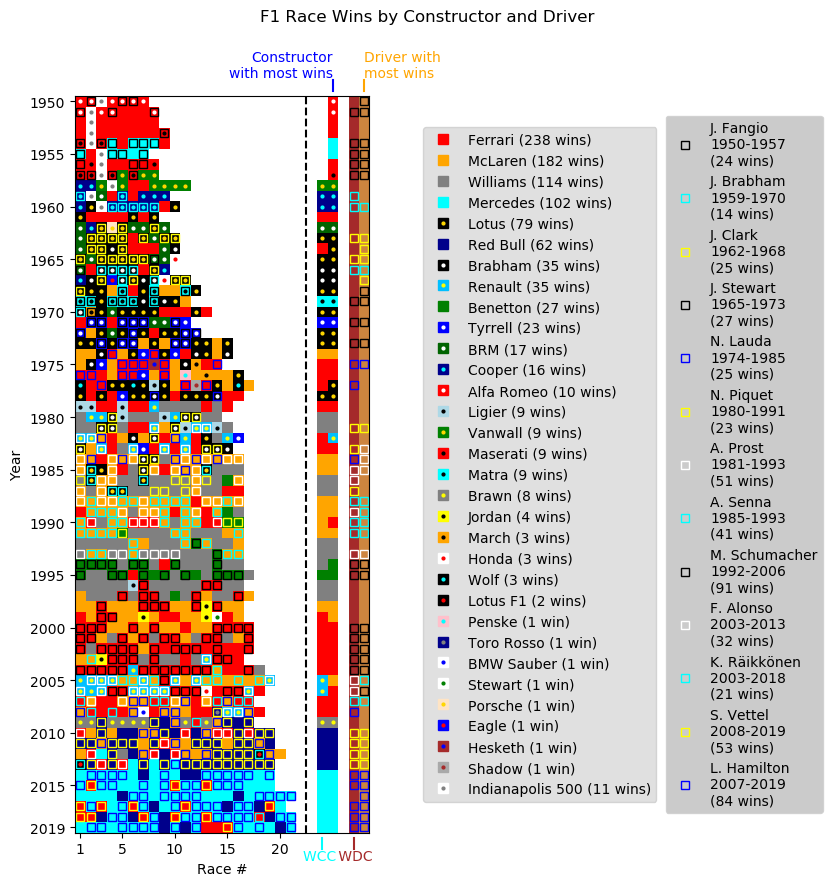

In [110]:
races_race_winners = run_query_results(cursor, COND_RACE_WINNERS)
results_race_winners = parse_dataframe(races_race_winners, constructors_df, champions_df)

plot_results_year_round_team_color(results_race_winners, constructors_df, drivers_df, result_type='Race Wins', win_type='win')

plt.savefig(graphs_folder + '\\f1_race_wins_team.png', dpi=200)
plt.show()

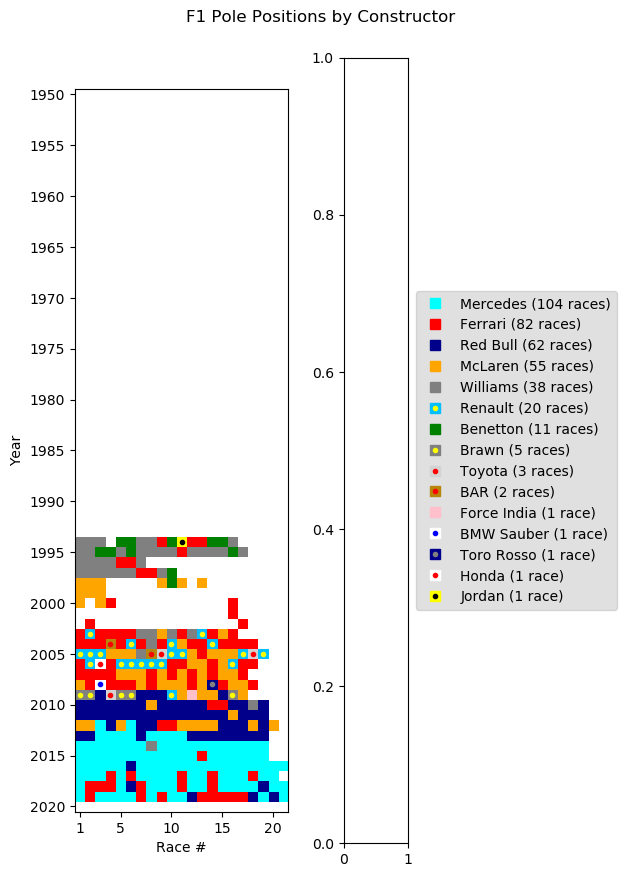

In [9]:
races_pole = run_query_qualifying(cursor, COND_POLE_POSITION)
results_pole = parse_dataframe(races_pole, constructors_df)

plot_results_year_round_team_color(results_pole, constructors_df, result_type='Pole Positions')

plt.savefig(graphs_folder + '\\f1_poles_team.png', dpi=200)
plt.show()

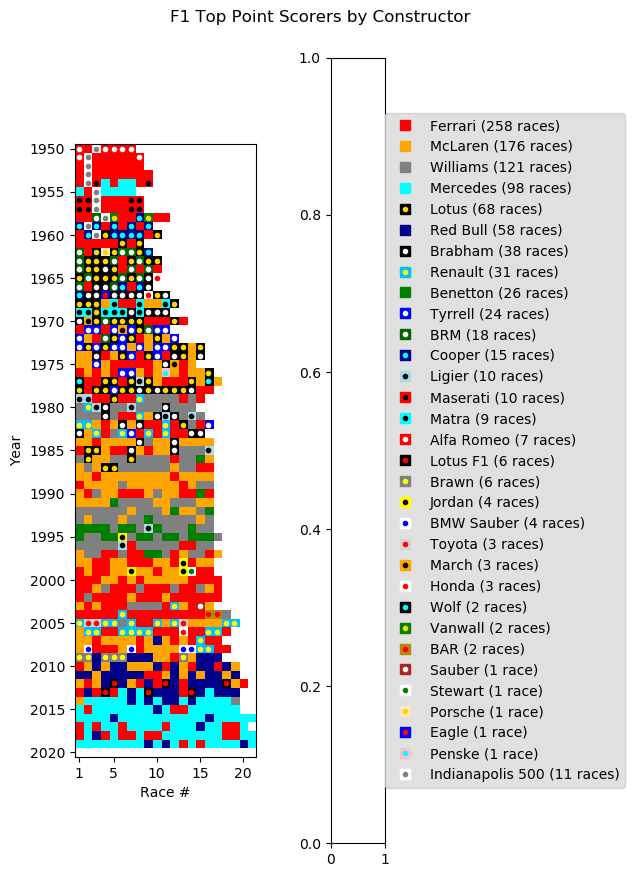

In [10]:
races_most_points = run_query_max_points(cursor)
results_most_points = parse_dataframe(races_most_points, constructors_df)

plot_results_year_round_team_color(results_most_points, constructors_df, result_type='Top Point Scorers')

plt.savefig(graphs_folder + '\\f1_most_points_team.png', dpi=200)
plt.show()

array([], dtype=uint32)

array([], dtype=uint32)

array([], dtype=uint32)

array([], dtype=uint32)

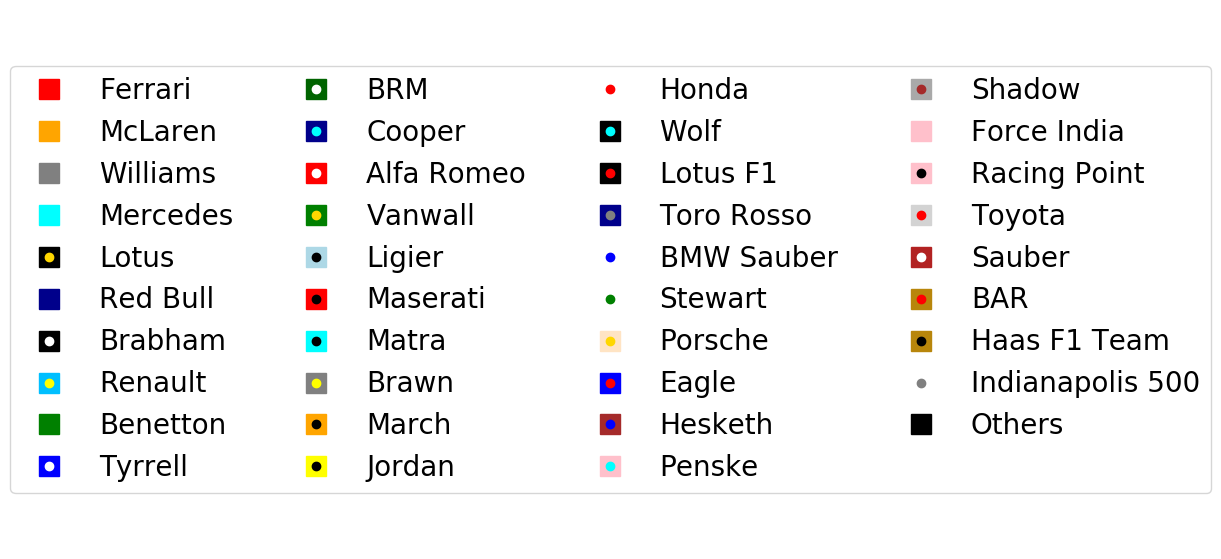

In [11]:
from f1_graphs import TEAM_COLORS

constructors_w_no_color = constructors_df[~constructors_df['parent'].isin(TEAM_COLORS)]
#display(constructors_w_no_color)

display(results_fastest_laps[np.isin(results_fastest_laps, constructors_w_no_color.index)])
display(results_most_points[np.isin(results_most_points, constructors_w_no_color.index)])
display(results_pole[np.isin(results_pole, constructors_w_no_color.index)])
display(results_race_winners[np.isin(results_race_winners, constructors_w_no_color.index)])

plt.figure(figsize=(15, 7))

plt.axis('off')

team_ref_view = constructors_df.set_index('constructorRef')

handles, labels = [], []
for team_id in TEAM_COLORS:
    colors = TEAM_COLORS[team_id]
    
    h1, = plt.plot(np.nan, 's', ms=14, color=colors[0])
    h2, = plt.plot(np.nan, 'o', ms=6, color=colors[1])
    lbl = team_ref_view.loc[team_id]['name'] if team_id != 'others' else 'Others'
    
    handles.append((h1, h2))
    labels.append(lbl)
    
plt.legend(handles, labels, loc='center', ncol=4, fontsize=20)